In [2]:
!pip install numpy matplotlib

1.28.63
Phrase 1: Can you please tell me how to get to the bakery?
Embedding 1: [0.859375, 0.20898438, -0.28320312, 0.5078125, 0.70703125, -0.37695312, -0.0044555664, 0.00031661987, -0.32226562, 0.49023438, 0.203125, 0.1875, -0.21386719, 0.015380859, 0.7578125, -0.16796875, -0.004211426, 0.0002593994, 0.09082031, -0.08984375, -0.10449219, -0.05419922, -0.14746094, -0.3984375, 0.53515625, -0.04345703, 0.5, -0.70703125, -0.038330078, -0.024658203, 0.22949219, 1.0390625, -0.34570312, -0.83984375, 0.18945312, -0.16894531, 0.57421875, -0.20800781, 0.5859375, -0.25585938, 0.35351562, 1.078125, 0.063964844, 1.3515625, 0.06689453, 0.07714844, 0.007537842, -0.04272461, 0.19335938, -0.13183594, 0.33398438, 0.114746094, 0.76171875, -0.6015625, -0.75, 0.030883789, -0.12207031, -0.71875, -0.052978516, -0.31640625, 0.19335938, 0.083496094, -0.4375, 0.44335938, 0.22949219, 0.3125, 0.265625, -0.03857422, 0.671875, -0.43359375, -0.21777344, 0.51171875, 0.30078125, 1.1171875, -0.26757812, -0.04321289, 0

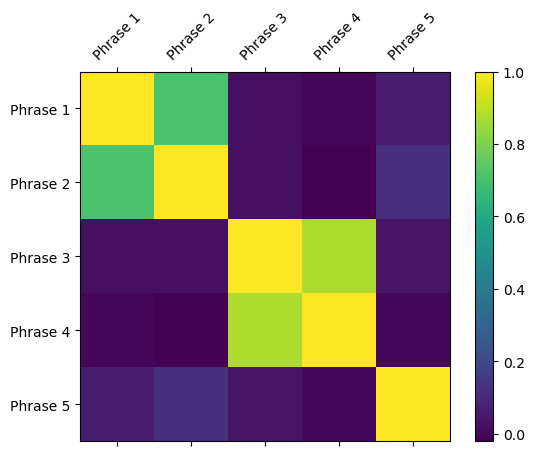

In [4]:
import os
import json
import boto3
import numpy as np
import matplotlib.pyplot as plt

print(boto3.__version__)

session = boto3.Session(
    profile_name=os.environ.get("BWB_PROFILE_NAME")
)
bedrock = boto3.client(service_name='bedrock-runtime')

def get_titan_embedding(text):
    body = json.dumps({"inputText": text})
    model_d = 'amazon.titan-embed-text-v1'
    mime_type = 'application/json'
    response = bedrock.invoke_model(body=body, modelId=model_d, accept=mime_type, contentType=mime_type)
    response_body = json.loads(response.get('body').read())
    embedding = response_body.get('embedding')
    return embedding

def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

phrases = [
    "Can you please tell me how to get to the bakery?",
    "I need directions to the bread shop",
    "Cats, dogs, and mice",
    "Felines, canines, and rodents",
    "Four score and seven years ago"
]

embeddings = [get_titan_embedding(phrase) for phrase in phrases]

# Print phrases and their embeddings
for i, phrase in enumerate(phrases):
    print(f"Phrase {i+1}: {phrase}")
    print(f"Embedding {i+1}: {embeddings[i]}")
    print('-' * 50)

# Calculate and print the cosine similarities
similarities = []
print("\nCosine Similarities:")
for i, e1 in enumerate(embeddings):
    row = []
    for j, e2 in enumerate(embeddings):
        similarity = cosine_similarity(e1, e2)
        row.append(similarity)
        print(f"Similarity between Phrase {i+1} and Phrase {j+1}: {similarity:.2f}")
    similarities.append(row)
    print('-' * 50)

# Visualize the results as a heatmap
fig, ax = plt.subplots()
cax = ax.matshow(similarities, cmap='viridis')
plt.colorbar(cax)
ax.set_xticks(np.arange(len(phrases)))
ax.set_yticks(np.arange(len(phrases)))
ax.set_xticklabels([f"Phrase {i+1}" for i in range(len(phrases))], rotation=45)
ax.set_yticklabels([f"Phrase {i+1}" for i in range(len(phrases))])
plt.show()